# Example Use Case Uber Fares Dataset

Nama : Finza YZF

Batch : PYTN - 090 - ONL

Dataset : uber.csv

Objective : 

1. Perkenalan

Proyek ini tentang perusahaan taksi terbesar di dunia Uber inc. Dalam proyek ini, kami ingin memprediksi tarif untuk kasus transaksi mereka di masa mendatang. Uber memberikan layanan kepada lakh pelanggan setiap hari. Sekarang menjadi sangat penting untuk mengelola data mereka dengan benar untuk menghasilkan ide bisnis baru untuk mendapatkan hasil terbaik. Akhirnya, menjadi sangat penting untuk memperkirakan harga tarif secara akurat.

- Objective 

Pada kasus ini, tujuan atau objective yang ingin dicapai antara lain sebagai berikut:

- Mengetahui faktor apa saja yang mempengaruhi dalam memprediksi tarif harga transportasi online
- Mengetahui nilai akurasi pada model pengujian yang digunakan untuk memprediksi tarif uber.
- Mengetahui model yang baik dengan best configuration untuk memprediksi harga transportasi online.

2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
import math
import phik
import pickle
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tools.eval_measures import rmse
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [14]:
data = pd.read_csv('uber.csv')
df=data.copy()

In [15]:
# melihat dataframe lengkap
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [16]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Dataset berisi bidang-bidang berikut:
- key               - pengidentifikasi unik untuk setiap perjalanan
- fare_amount       - biaya setiap perjalanan dalam usd
- pickup_datetime   - tanggal dan waktu saat meter diaktifkan
- pickup_longitude  - garis bujur tempat meter bergerak
- pickup_latitude   - garis lintang tempat meter diaktifkan
- dropoff_longitude - garis bujur tempat meteran dilepas
- dropoff_latitude  - garis lintang tempat meteran dilepas
- passenger_count   - jumlah penumpang di dalam kendaraan (nilai yang dimasukkan pengemudi)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [18]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [19]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [20]:
df.shape

(200000, 9)

In [21]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [22]:
df.rename({'fare_amount':'tarif',
            'pickup_datetime':'transaksi',
            'pickup_longitude':'long1',
            'pickup_latitude':'lat1',
            'dropoff_longitude':'long2',
            'dropoff_latitude':'lat2',
            'passenger_count':'penumpang'},axis=1, inplace=True
            )

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tarif      200000 non-null  float64
 1   transaksi  200000 non-null  object 
 2   long1      200000 non-null  float64
 3   lat1       200000 non-null  float64
 4   long2      199999 non-null  float64
 5   lat2       199999 non-null  float64
 6   penumpang  200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [24]:
df.shape

(200000, 7)

4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Apa saja yang berpengaruh terhadap harga Uber ? 
Jarak 
Waktu Jam 
Hari 
Musim
Kebutuhan dan ketersedian Uber 
ada tempat2 spesial 
jumlah penumpang 

In [25]:
df.describe()

,tarif,long1,lat1,long2,lat2,penumpang
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [26]:
df.isnull().sum()

tarif        0
transaksi    0
long1        0
lat1         0
long2        1
lat2         1
penumpang    0
dtype: int64

In [27]:
df.dtypes

tarif        float64
transaksi     object
long1        float64
lat1         float64
long2        float64
lat2         float64
penumpang      int64
dtype: object

Dari output di atas, dapat dilihat bahwa tipe data 'transaksi' adalah bertipe 'object'

Namun menurut definisi data, 'transaksi' atau disini bisa diartikan awal meter argo dinyalakan adalah variabel stempel waktu tanggal, yang salah diartikan sebagai 'objek', jadi kami akan mengonversi tipe data variabel ini menjadi 'datetime'.

In [28]:
df.transaksi = pd.to_datetime(df.transaksi, errors='coerce') 
# For datetime64[ns] types, NaT represents missing values.

In [29]:
df.dtypes

tarif                    float64
transaksi    datetime64[ns, UTC]
long1                    float64
lat1                     float64
long2                    float64
lat2                     float64
penumpang                  int64
dtype: object

In [30]:
# menambahkan variabel yang mengukur jarak antara pickup dan drop
df= df.assign(jam = df.transaksi.dt.hour,
             hari= df.transaksi.dt.day,
             bulan = df.transaksi.dt.month,
             tahun = df.transaksi.dt.year,
             dayofweek = df.transaksi.dt.dayofweek)

penggunaan 'Heversine formula' untuk menghitung jarak antara dua titik dan perjalanan, menggunakan nilai bujur dan lintang.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   tarif      200000 non-null  float64            
 1   transaksi  200000 non-null  datetime64[ns, UTC]
 2   long1      200000 non-null  float64            
 3   lat1       200000 non-null  float64            
 4   long2      199999 non-null  float64            
 5   lat2       199999 non-null  float64            
 6   penumpang  200000 non-null  int64              
 7   jam        200000 non-null  int64              
 8   hari       200000 non-null  int64              
 9   bulan      200000 non-null  int64              
 10  tahun      200000 non-null  int64              
 11  dayofweek  200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(6)
memory usage: 18.3 MB


In [32]:
from math import *

Heversine formula
hav(θ) = sin**2(θ/2).

In [33]:
# rumus fungsi untuk menghitung jarak perjalanan dari longitudes dan latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [34]:
df['jarak_km'] = distance_transform(df['long1'].to_numpy(),
                                                df['lat1'].to_numpy(),
                                                df['long2'].to_numpy(),
                                                df['lat2'].to_numpy()
                                              )

In [35]:
df.head()

,tarif,transaksi,long1,lat1,long2,lat2,penumpang,jam,hari,bulan,tahun,dayofweek,jarak_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tarif,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
long1,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
lat1,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
long2,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
lat2,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
penumpang,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000
jam,200000.0,13.491335,6.515531,0.000000,9.000000,14.000000,19.000000,23.000000
hari,200000.0,15.704670,8.687409,1.000000,8.000000,16.000000,23.000000,31.000000
bulan,200000.0,6.281795,3.438925,1.000000,3.000000,6.000000,9.000000,12.000000
tahun,200000.0,2011.742440,1.856397,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


ketika di describe parameter "transaksi" tidak muncul maka akan dihilangkan
yang mana parameter tersebut sudah di definisikan menjadi 5 parameter baru

In [37]:
df = df.drop('transaksi',axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tarif      200000 non-null  float64
 1   long1      200000 non-null  float64
 2   lat1       200000 non-null  float64
 3   long2      199999 non-null  float64
 4   lat2       199999 non-null  float64
 5   penumpang  200000 non-null  int64  
 6   jam        200000 non-null  int64  
 7   hari       200000 non-null  int64  
 8   bulan      200000 non-null  int64  
 9   tahun      200000 non-null  int64  
 10  dayofweek  200000 non-null  int64  
 11  jarak_km   199999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 18.3 MB


dalam output describe mengilustrasikan nilai variabel/parameter.
ada beberapa nilai yang secara nalar atau dugaan tidak sesuai dintaranya yaitu :
- tarif terendah : -52 USD
- penumpang minimum : 0 orang
- penumpang maksimum : 208 orang
- jarak terdekat : 0 km
- jarak terjauh : +16.409km

## Pengecekan Outliner
pengamatan yang tampaknya menyimpang jelas dari pengamatan lain dalam data yang disebutkan diatas merupakan outliner, jika outlier tidak dihilangkan, akurasi model dapat menurun

<Axes: >

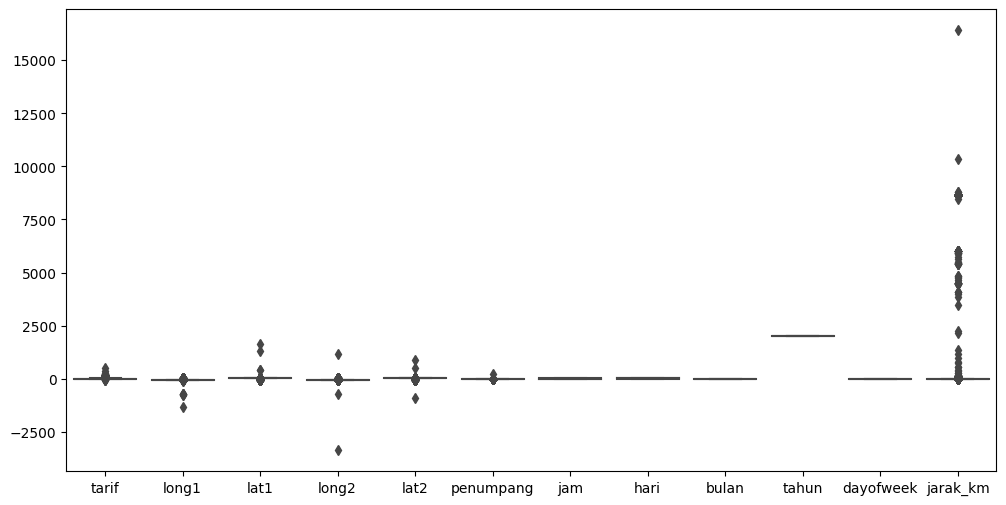

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df)


In [40]:
medianFiller = lambda x : x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis = 0)

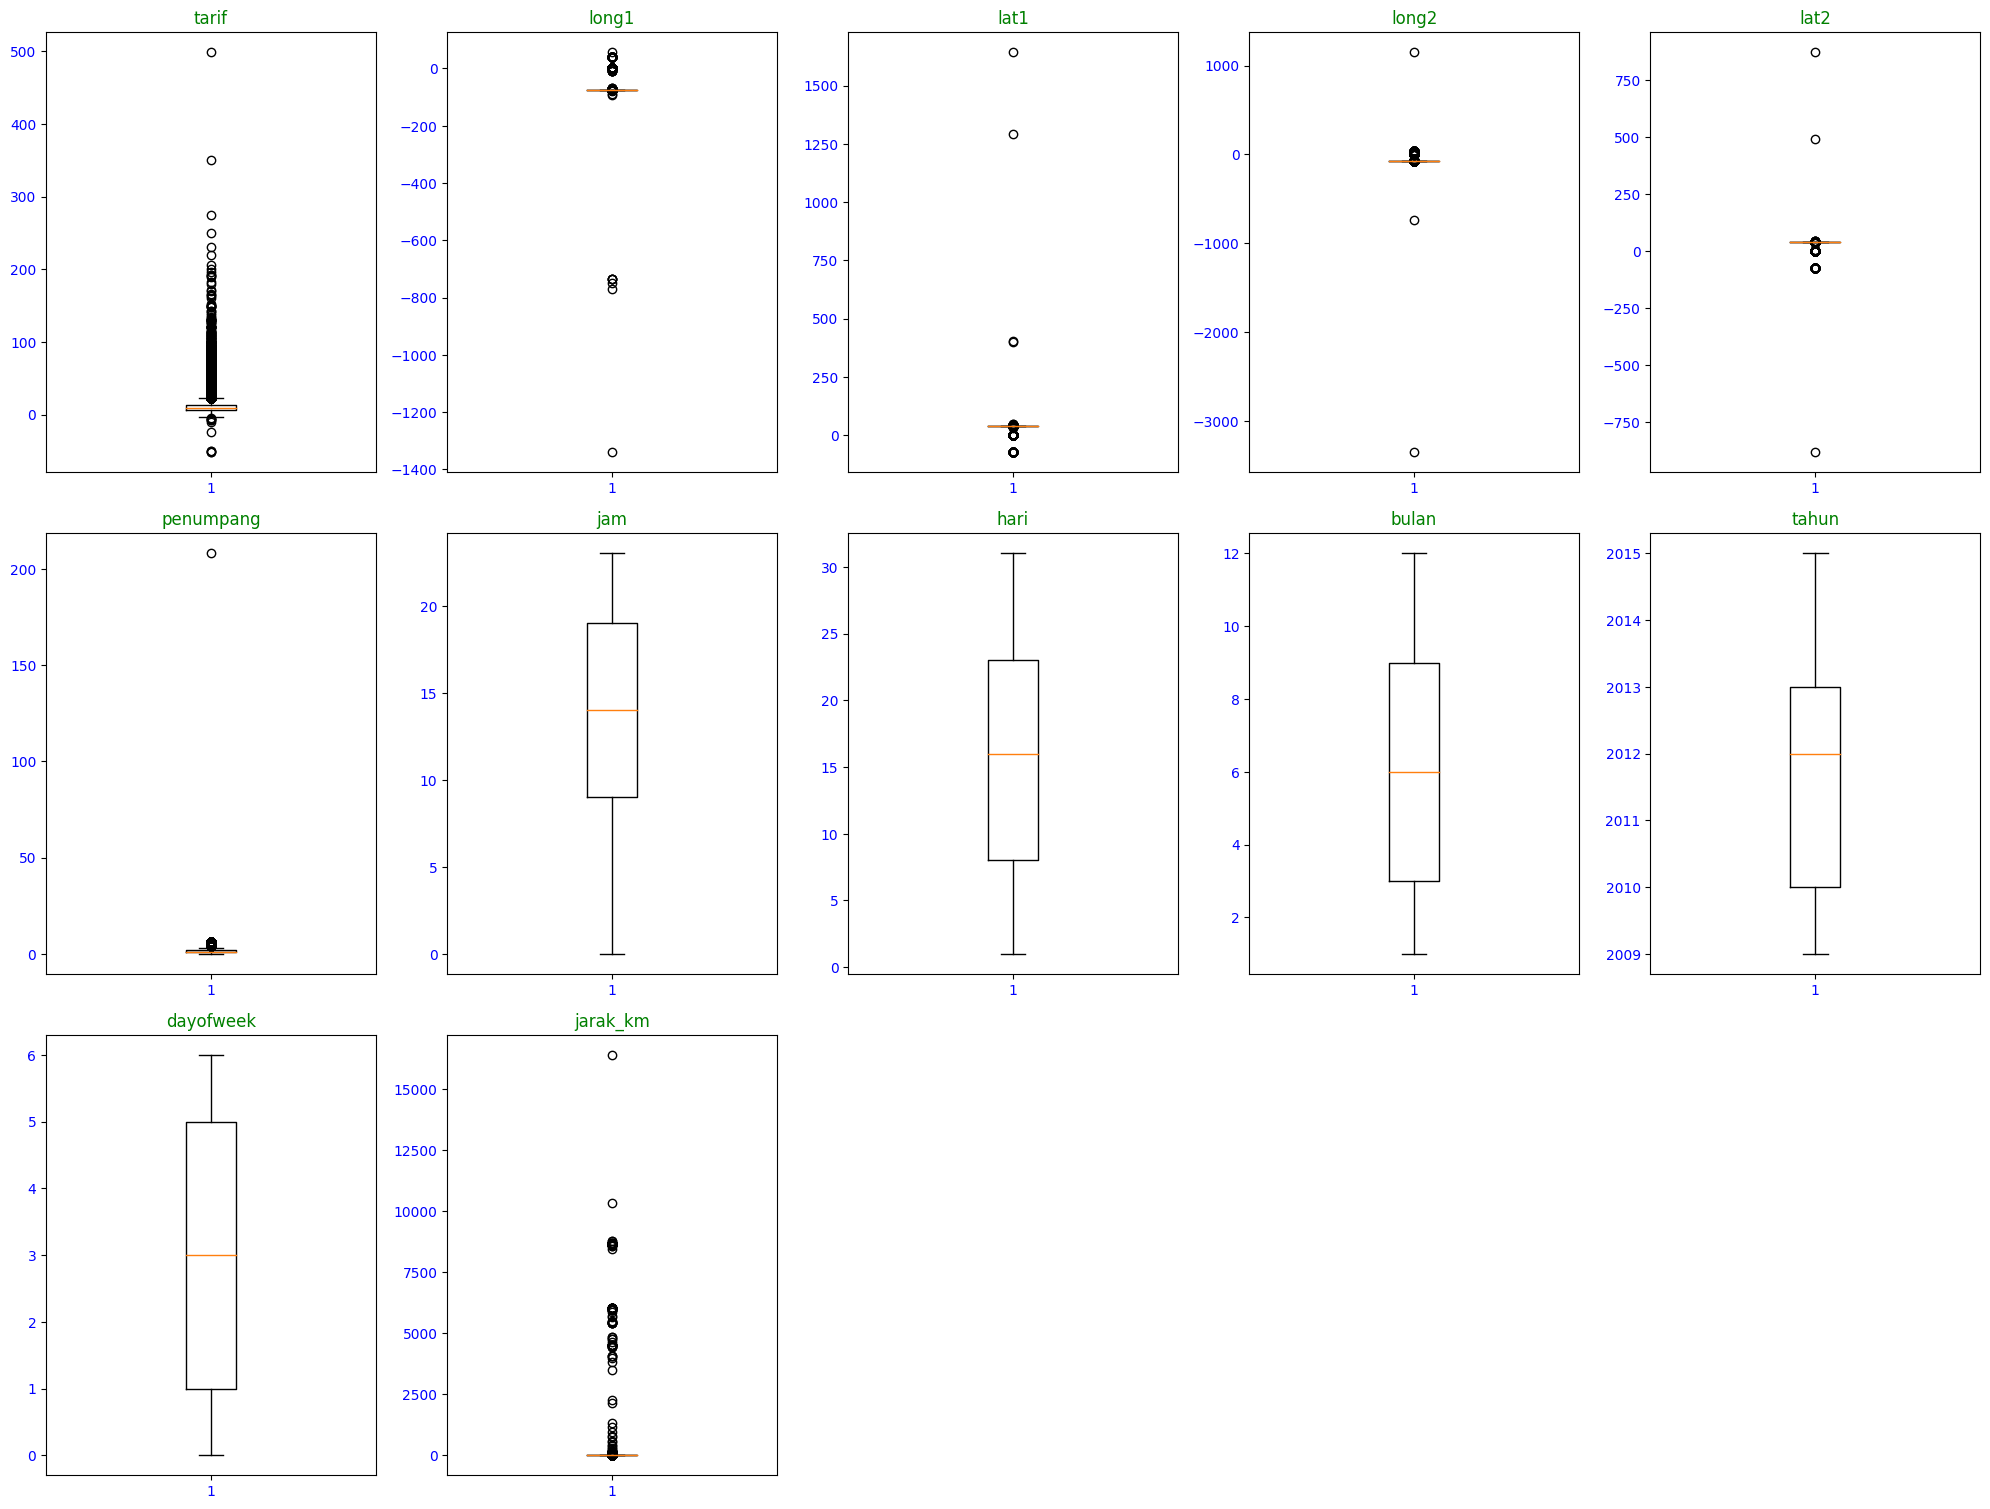

In [41]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, color= 'green')
    plt.xticks(color='blue')
    plt.yticks(color='blue')

plt.show()

In [42]:
df.shape

(200000, 12)

## Hapus Outliner biaya

In [43]:
#We will only keep the observation where fare is between 2.5
df = df.loc[(df.tarif >= 0)]

In [44]:
df.shape

(199983, 12)

In [45]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [46]:
df = treat_outliers_all(df , df.iloc[: , 0::])

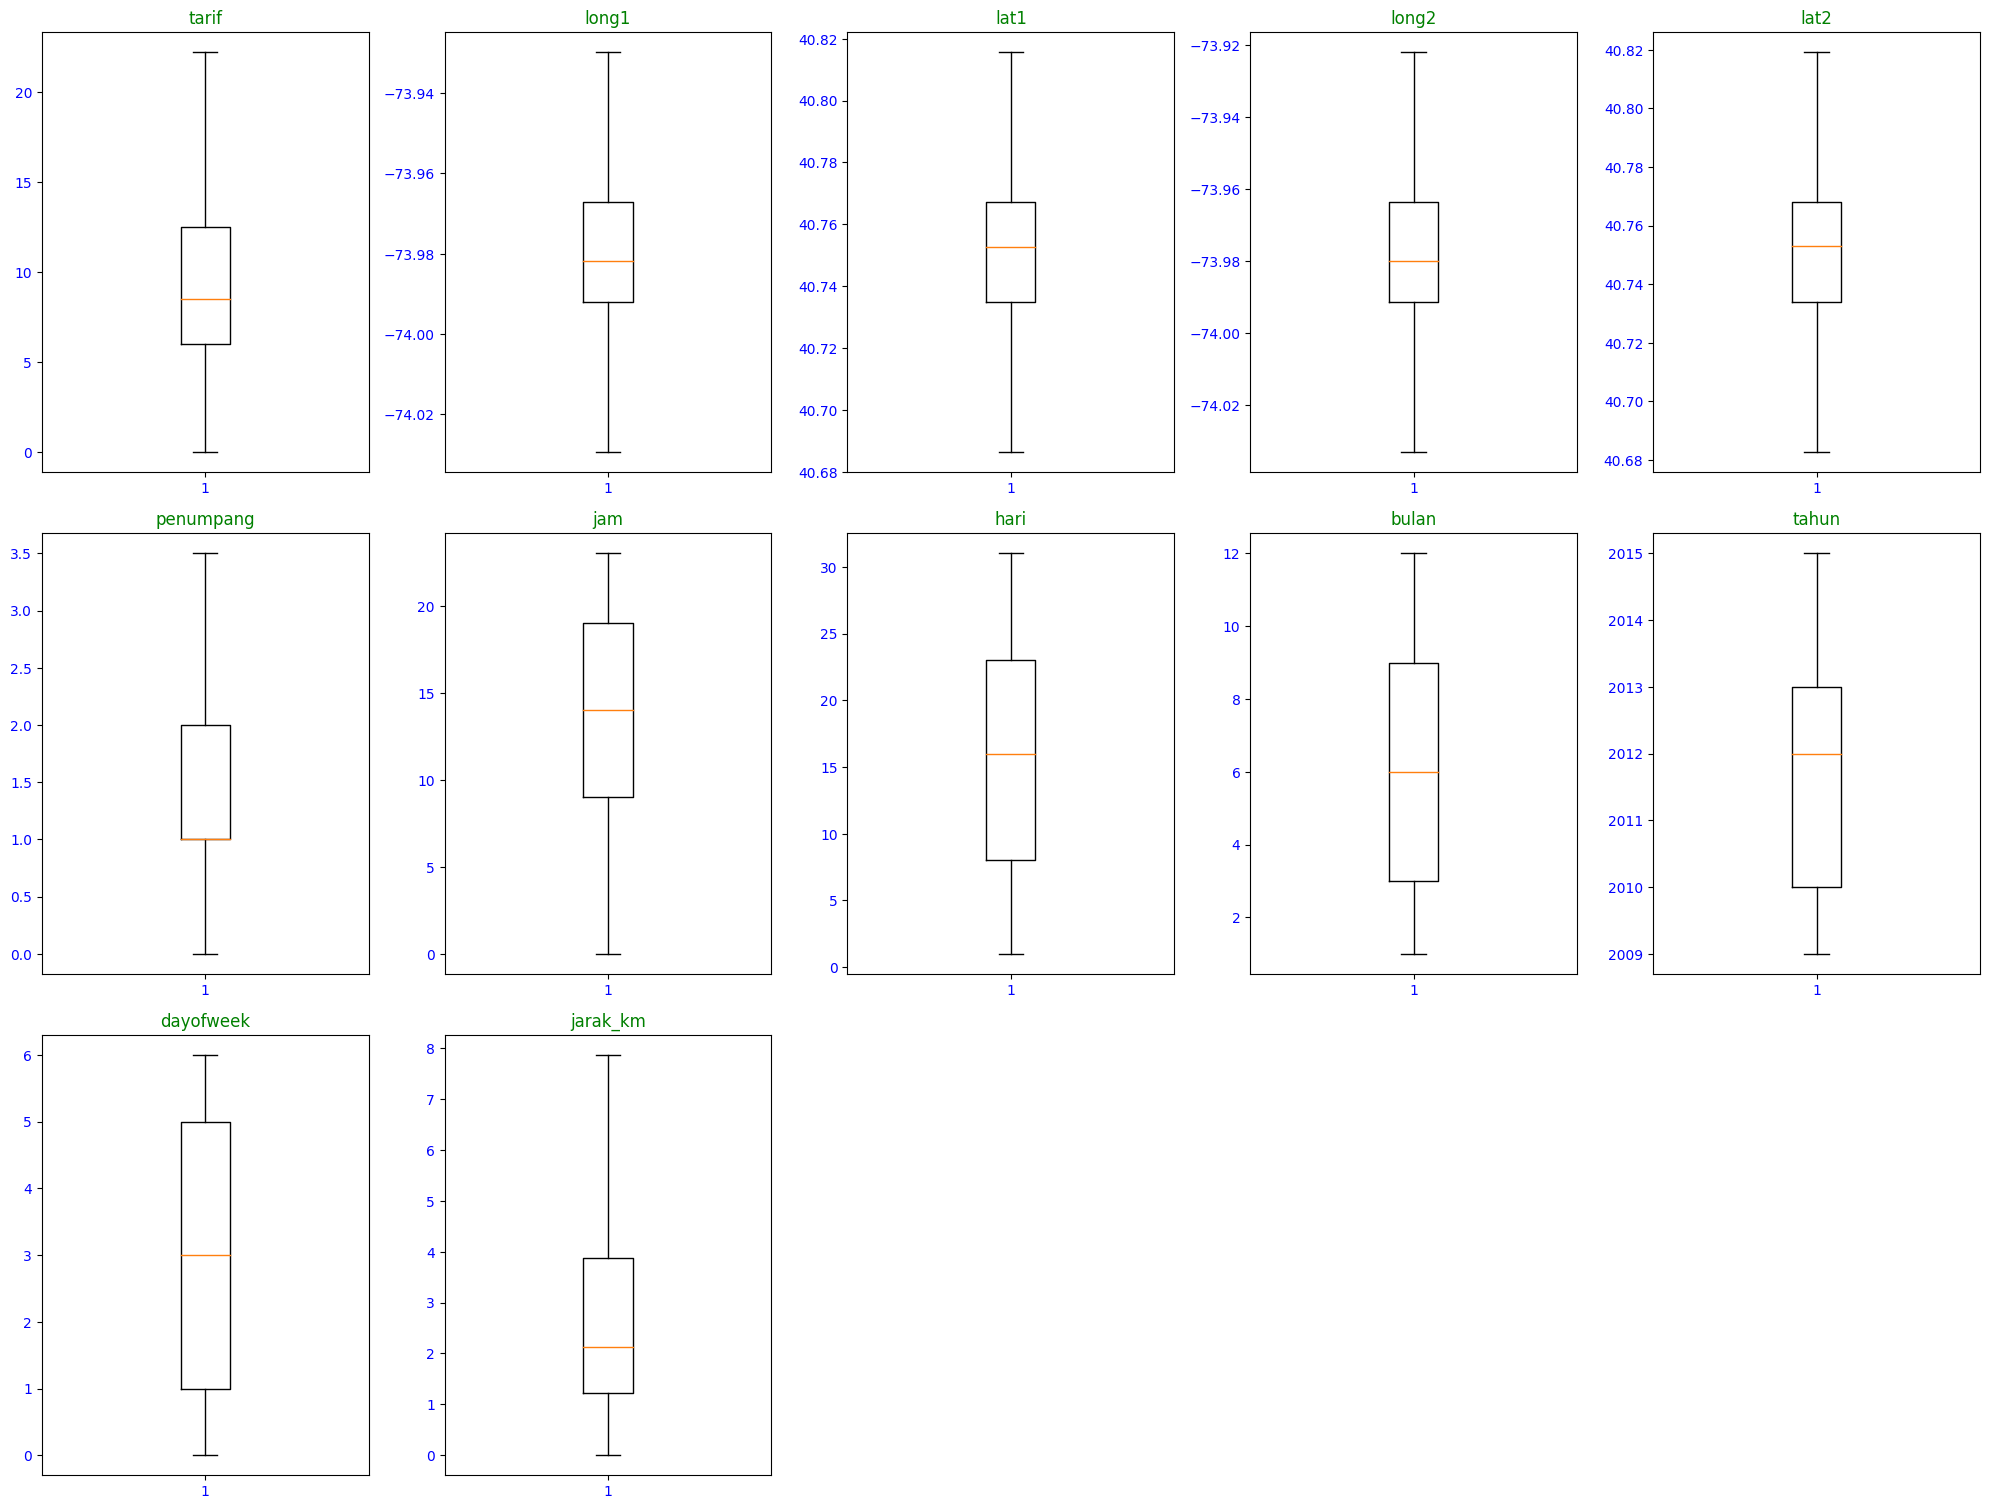

In [47]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable, color='green')
    plt.xticks(color='blue')
    plt.yticks(color='blue')
plt.show()

In [48]:
df.shape

(199983, 12)

## Hapus Outliner Jarak

In [49]:
#We will only keep the observation where travel distance is less than or equal to 130
df= df.loc[(df.jarak_km >= 1) | (df.jarak_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (199983, 12)


## Hapus Outliner Jumlah Penumpang
*merujuk paket tertinggi di web uber maksimal 5 penumpang/armada

In [50]:
#hanya menyimpan jumlah penumpang maksimum 5
df= df.loc[(df.penumpang >= 1) | (df.penumpang <= 5)]

## Hapus Outliner koordinat 
batasan koordinat :
- lintang -90 s/d 90
- bujur -180 s/d 180

In [51]:
incorrect_coordinates = df.loc[(df.lat1 > 90) |(df.lat1 < -90) |
                                   (df.lat2 > 90) |(df.lat2 < -90) |
                                   (df.long1 > 180) |(df.long1 < -180) |
                                   (df.long2 > 180) |(df.long2 < -180)
                                    ]

In [52]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [53]:
df.shape

(199983, 12)

## Missing Values

In [54]:
Total = df.isnull().sum().sort_values(ascending = False)    
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])  
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
tarif,0,0.0,float64
long1,0,0.0,float64
lat1,0,0.0,float64
long2,0,0.0,float64
lat2,0,0.0,float64
penumpang,0,0.0,float64
jam,0,0.0,int64
hari,0,0.0,int64
bulan,0,0.0,int64
tahun,0,0.0,int64


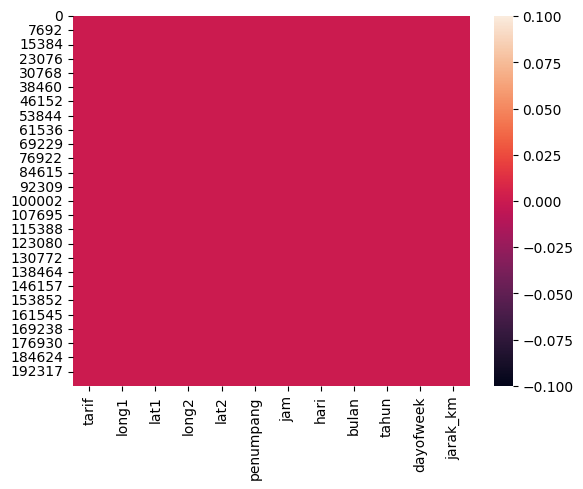

In [55]:
sns.heatmap(df.isnull())

plt.show()

## Korelasi antar Variabel

In [56]:
corr = df.corr()

corr

,tarif,long1,lat1,long2,lat2,penumpang,jam,hari,bulan,tahun,dayofweek,jarak_km
tarif,1.000000,0.154131,-0.110889,0.218709,-0.125933,0.015882,-0.023607,0.004443,0.030640,0.141429,0.013604,0.844568
long1,0.154131,1.000000,0.259520,0.425632,0.073295,-0.013242,0.011585,-0.003201,0.001186,0.010276,-0.024638,0.098030
lat1,-0.110889,0.259520,1.000000,0.048864,0.515749,-0.012881,0.029683,-0.001531,0.001565,-0.014228,-0.042307,-0.046816
long2,0.218709,0.425632,0.048864,1.000000,0.245685,-0.009312,-0.046589,-0.004021,0.002389,0.011367,-0.003305,0.186524
lat2,-0.125933,0.073295,0.515749,0.245685,1.000000,-0.006295,0.019760,-0.003475,-0.001194,-0.009545,-0.031924,-0.038837
penumpang,0.015882,-0.013242,-0.012881,-0.009312,-0.006295,1.000000,0.020280,0.002699,0.010399,-0.009736,0.048566,0.009686
jam,-0.023607,0.011585,0.029683,-0.046589,0.019760,0.020280,1.000000,0.004683,-0.003906,0.002135,-0.086934,-0.038345
hari,0.004443,-0.003201,-0.001531,-0.004021,-0.003475,0.002699,0.004683,1.000000,-0.017382,-0.012133,0.005625,0.003036
bulan,0.030640,0.001186,0.001565,0.002389,-0.001194,0.010399,-0.003906,-0.017382,1.000000,-0.115862,-0.008815,0.011613
tahun,0.141429,0.010276,-0.014228,0.011367,-0.009545,-0.009736,0.002135,-0.012133,-0.115862,1.000000,0.006097,0.024332


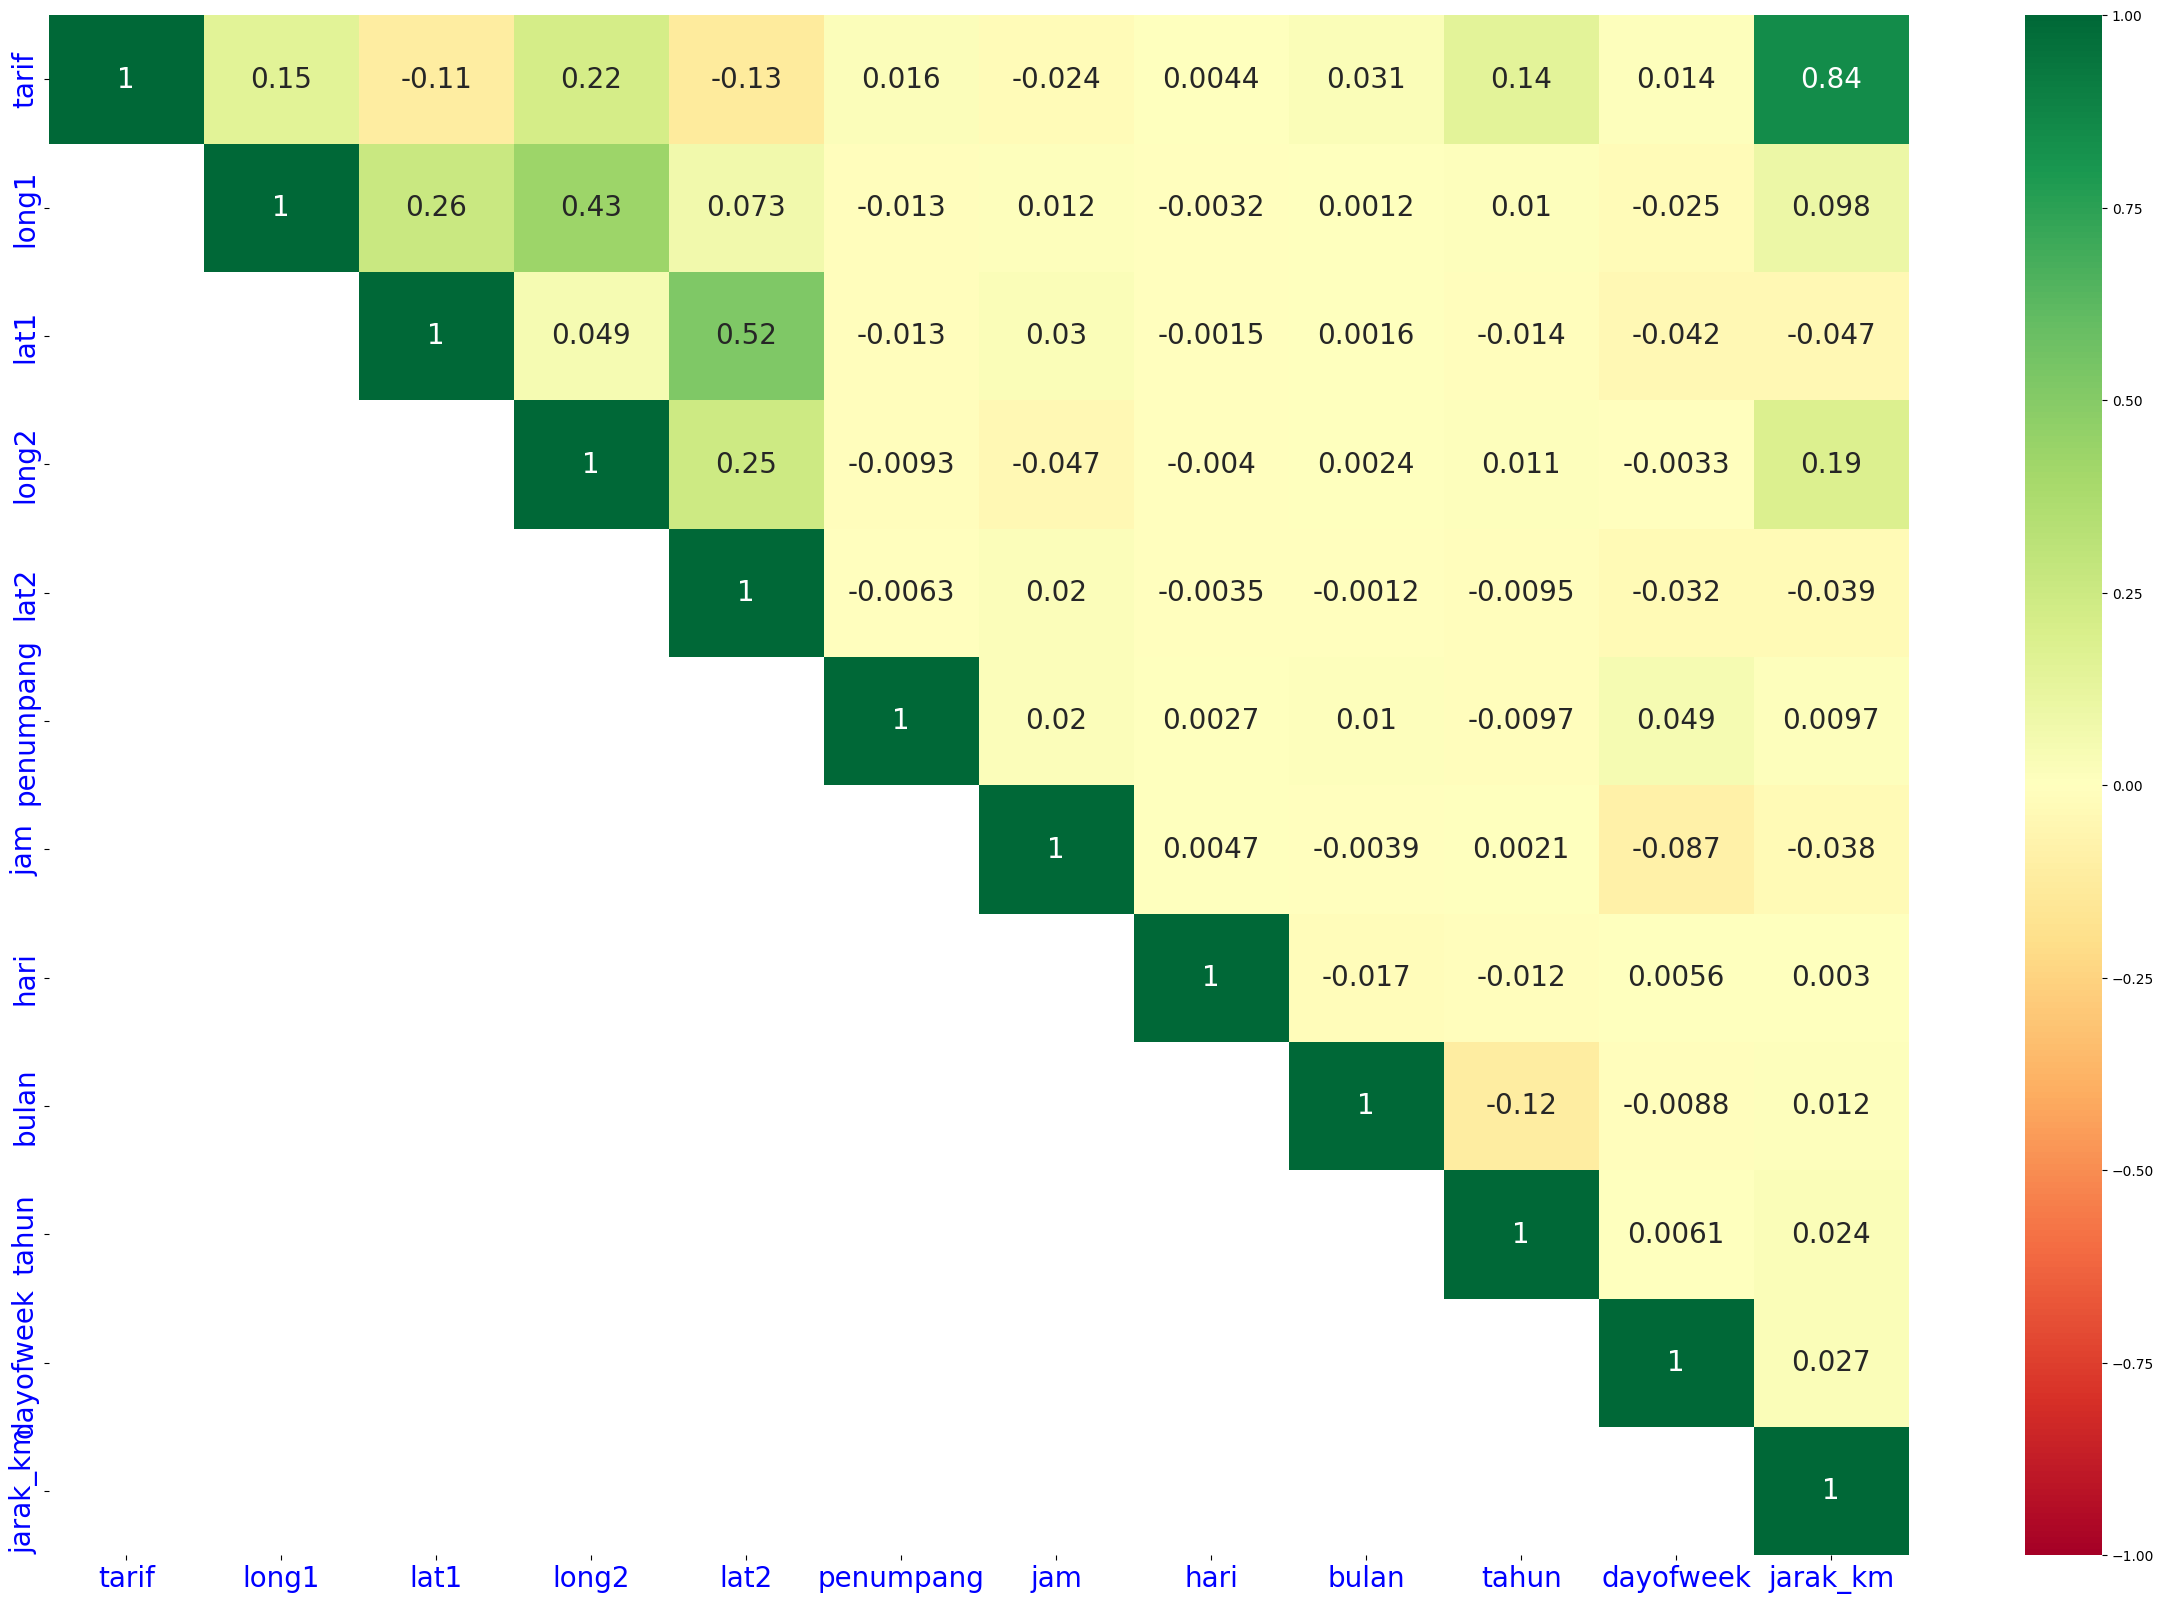

In [57]:
plt.figure(figsize = (30,20))

mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

plt.xticks(fontsize = 20, color='blue')
plt.yticks(fontsize = 20, color='blue')

plt.show()

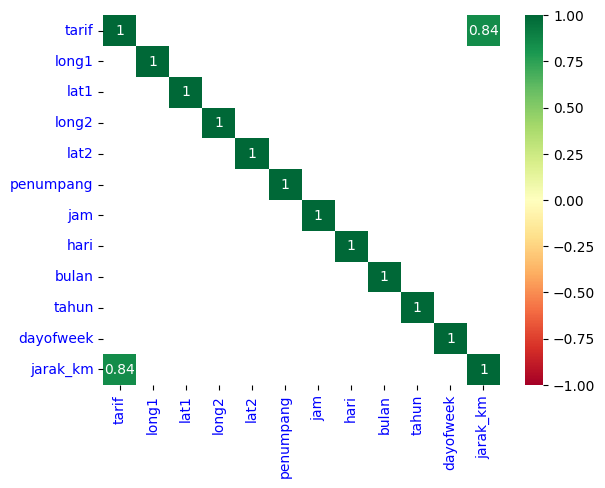

In [58]:
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 10})
plt.xticks(color='blue')
plt.yticks(color='blue')
plt.show()

korelasi positif tertinggi terjadi antara var. biaya & jarak tempuh dengan nilai 0.84

## Jam sibuk dalam seminggu
weekday & weekend

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000')])

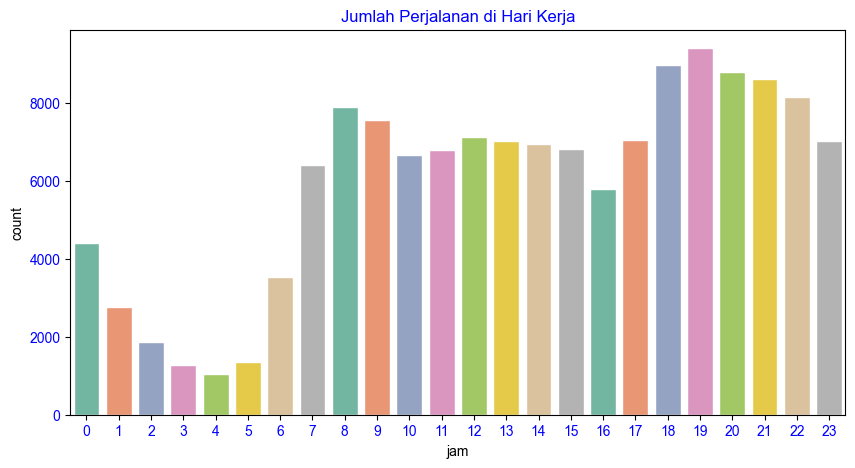

In [59]:
# weekday
plt.figure(figsize=(10,5))
plt.title('Jumlah Perjalanan di Hari Kerja',color='blue')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='jam', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')
plt.xticks(color='blue')
plt.yticks(color='blue')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000')])

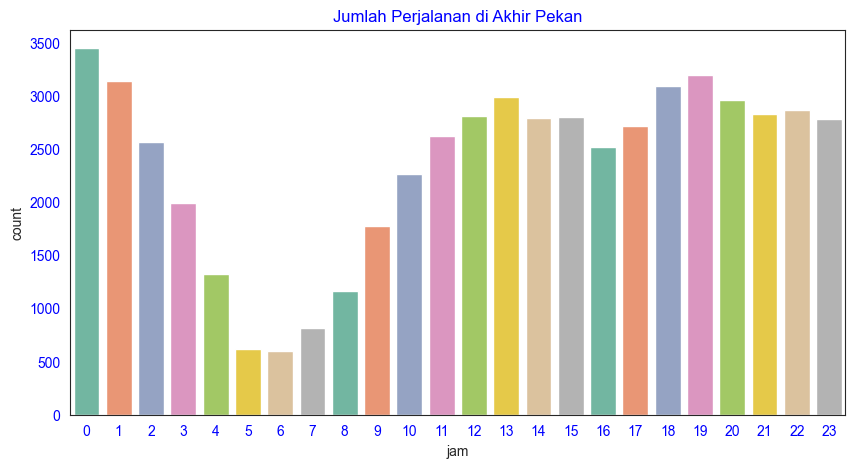

In [60]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Jumlah Perjalanan di Akhir Pekan',color='blue')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='jam', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')
plt.xticks(color='blue')
plt.yticks(color='blue')

## Tarif rata-rata Hari Kerja dan Akhir Pekan

In [61]:
# Set the days in the dataset as week days and week ends
week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
tarif_hari_kerja = week_days.groupby(['jam']).tarif.mean().to_frame().reset_index()
tarif_akhir_pekan = week_ends.groupby(['jam']).tarif.mean().to_frame().reset_index()

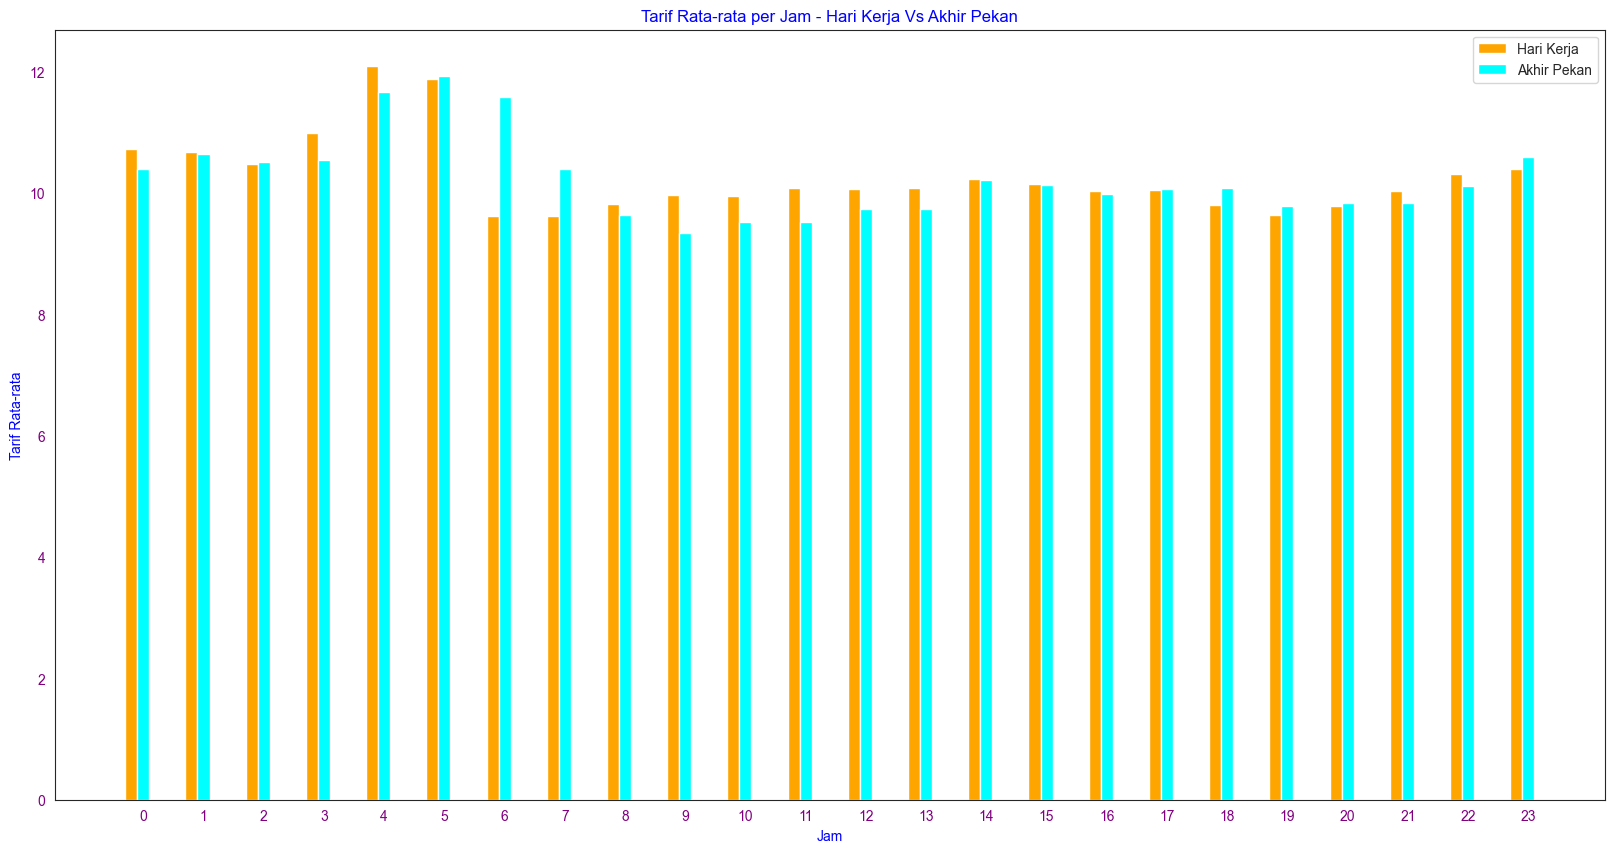

In [62]:
# hours
x = np.array(tarif_hari_kerja.jam)
# an array of week day fare 
y = np.array(tarif_hari_kerja.tarif)
# an array of week end fare
z = np.array(tarif_akhir_pekan.tarif)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Tarif Rata-rata per Jam - Hari Kerja Vs Akhir Pekan', color='blue')
plt.xlabel('Jam', color='blue')
plt.ylabel('Tarif Rata-rata', color='blue')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='orange', align='center', label = 'Hari Kerja')
ax.bar(x, z, width=0.2, color='cyan', align='center', label = 'Akhir Pekan')
plt.xticks(range(0,24))
plt.xticks(color='purple')
plt.yticks(color='purple')
plt.legend()
plt.show()

# Distribusi Variabel Kunci

dalam korelasi sebelumya variabel yang saling berpengaruh tertinggi adalah Jarak dengan Biaya

Distribusi Var Tarif

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/2608457773.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(df.tarif, shade=True)


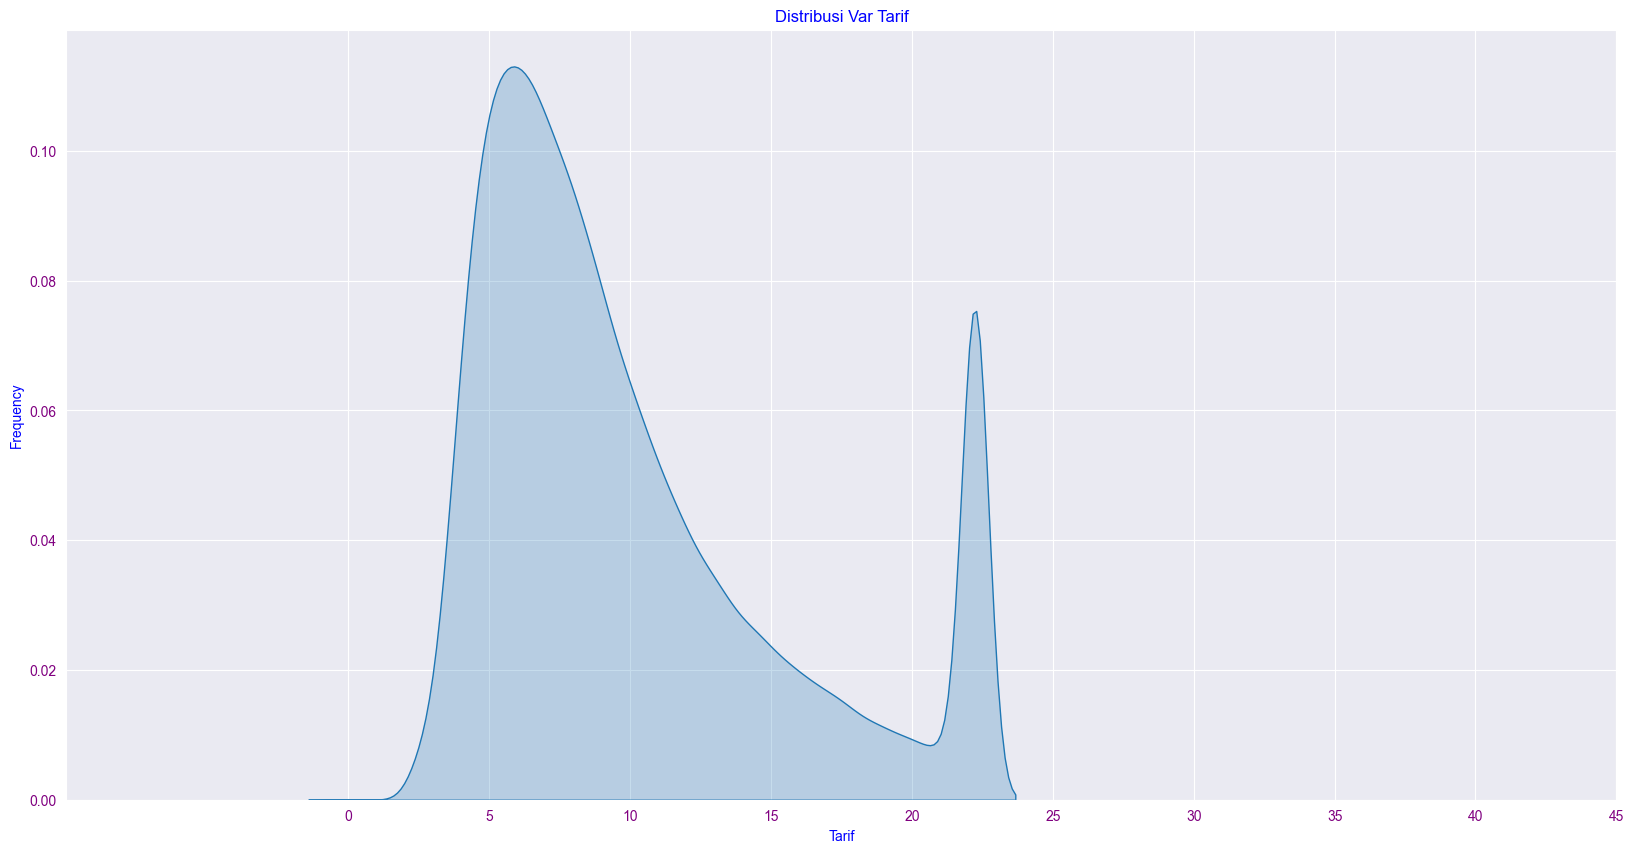

In [63]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribusi Var Tarif", color='blue')
plt.xlabel("Tarif", color='blue')
plt.ylabel("Frequency", color='blue')
plt.xlim(-10,20)
plt.xticks(range(0,50,5))
plt.xticks(color='purple')
plt.yticks(color='purple')

snsplot = sns.kdeplot(df.tarif, shade=True)

Distribusi Var Jarak

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/1216054355.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.plot = sns.kdeplot(df[df.jarak_km<600].jarak_km, shade=True)


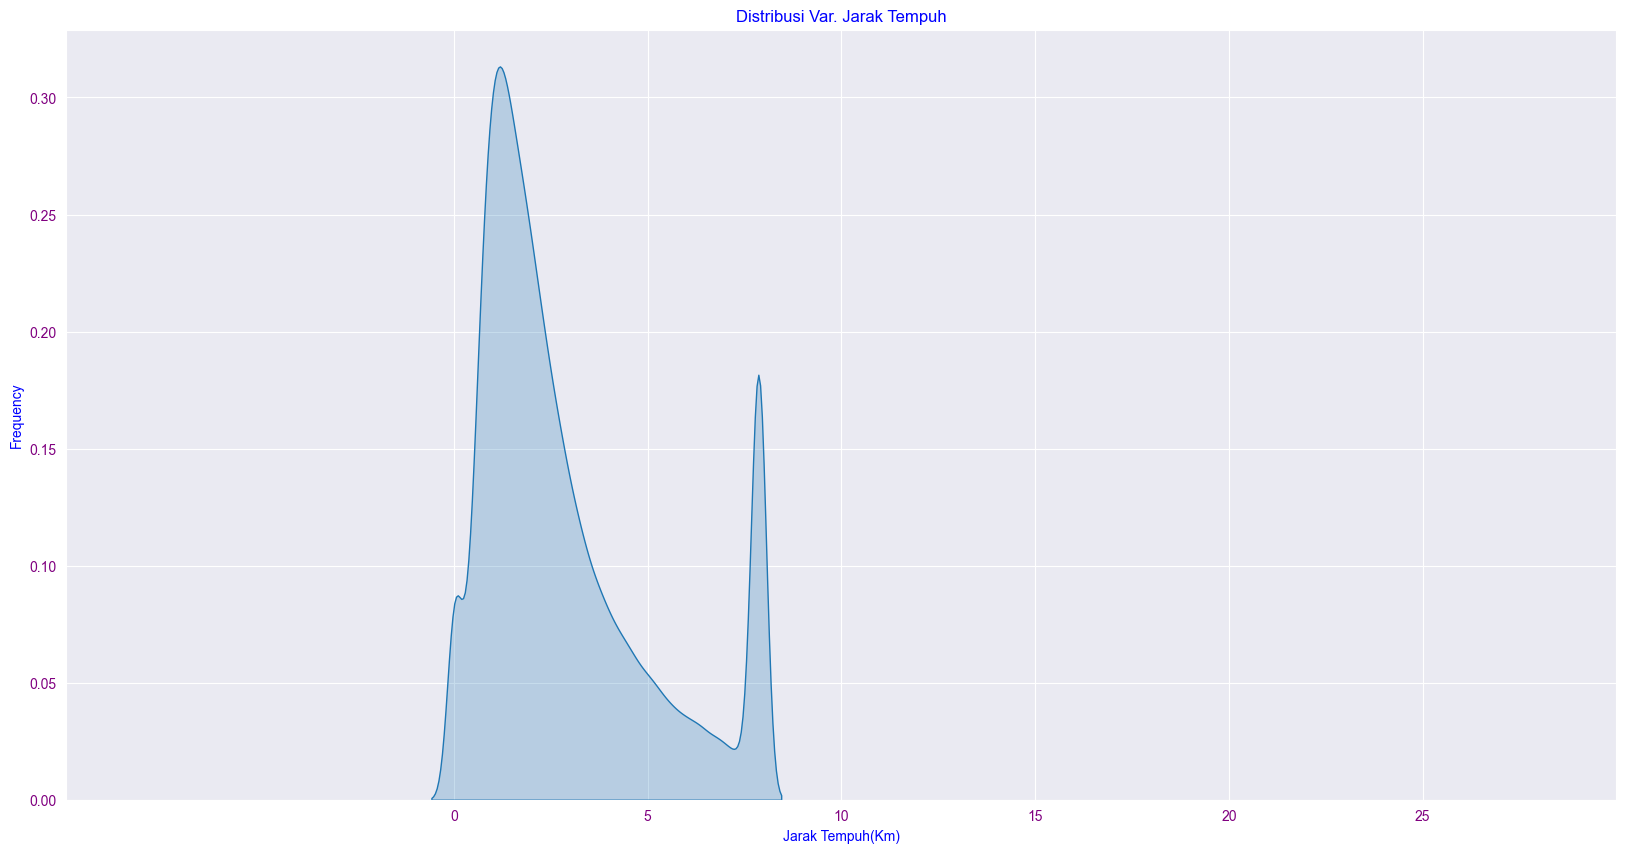

In [64]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribusi Var. Jarak Tempuh", color='blue')
plt.xlabel("Jarak Tempuh(Km)", color='blue')
plt.ylabel("Frequency", color='blue')
plt.xlim(-10, 30)
plt.xticks(range(0,30,5))
plt.xticks(color='purple')
plt.yticks(color='purple')

sns.plot = sns.kdeplot(df[df.jarak_km<600].jarak_km, shade=True)

5. Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199983 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tarif      199983 non-null  float64
 1   long1      199983 non-null  float64
 2   lat1       199983 non-null  float64
 3   long2      199983 non-null  float64
 4   lat2       199983 non-null  float64
 5   penumpang  199983 non-null  float64
 6   jam        199983 non-null  int64  
 7   hari       199983 non-null  int64  
 8   bulan      199983 non-null  int64  
 9   tahun      199983 non-null  int64  
 10  dayofweek  199983 non-null  int64  
 11  jarak_km   199983 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 19.8 MB


In [66]:
#split data feature dan data target 
y = df['tarif']
x = df[['penumpang','jam','hari','bulan','tahun','dayofweek','jarak_km']]
x.head()

,penumpang,jam,hari,bulan,tahun,dayofweek,jarak_km
0,1.0,19,7,5,2015,3,1.683323
1,1.0,20,17,7,2009,4,2.457590
2,1.0,21,24,8,2009,0,5.036377
3,3.0,8,26,6,2009,4,1.661683
4,3.5,17,28,8,2014,3,4.475450


In [67]:
#split data train tes set perbandingan 20:80
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [68]:
# check dimensi train test set

# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (159986, 7)
The shape of X_test is: (39997, 7)
The shape of y_train is: (159986,)
The shape of y_test is: (39997,)


karena data prediksi yang dicari berupa 

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
linR = LinearRegression()
linR_model = linR.fit(x_train, y_train)

In [71]:
y_pred_linR=linR_model.predict(x_test)
y_pred_linR

array([13.16421851,  9.53564927, 14.10361218, ...,  8.01183756,
        8.74386745,  5.072844  ])

In [72]:
print(linR.coef_)
print(30*'====')
print(linR.intercept_)

[ 0.05280569  0.00584189  0.00242713  0.05621254  0.3675908  -0.02870066
  2.05526167]
-735.7461017161868


In [73]:
linR.score(x_test, y_test)

0.7353006791671193

In [74]:
x.head()


,penumpang,jam,hari,bulan,tahun,dayofweek,jarak_km
0,1.0,19,7,5,2015,3,1.683323
1,1.0,20,17,7,2009,4,2.457590
2,1.0,21,24,8,2009,0,5.036377
3,3.0,8,26,6,2009,4,1.661683
4,3.5,17,28,8,2014,3,4.475450


In [75]:
penumpang = 2
jam = 23
hari = 1
bulan = 4
tahun = 2023
dayofweek = 5
jarak_km = 15


linR.predict([[penumpang, jam, hari, bulan, tahun, dayofweek, jarak_km]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.04275666])

In [76]:
m1 = linR.coef_[0]
m2 = linR.coef_[1] 
m3 = linR.coef_[2] 
m4 = linR.coef_[3]
m5 = linR.coef_[4] 
m6 = linR.coef_[5] 
m7 = linR.coef_[6]

penumpang = 2
jam = 23
hari = 1
bulan = 4
tahun = 2023
dayofweek = 5
jarak_km = 15

tarif = m1 * penumpang + m2 * jam + m3 * hari + m4 * bulan + m5 * tahun + m6 * dayofweek + m7 * jarak_km + linR.intercept_
print(tarif)

39.042756660979876


OLS

In [77]:
OLS_model = sm.OLS(y, x).fit()
y_pred_OLS = OLS_model.predict(x_test)

OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  tarif   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          4.147e+05
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        18:15:35   Log-Likelihood:                     -4.9725e+05
No. Observations:              199983   AIC:                                  9.945e+05
Df Residuals:                  199976   BIC:                                  9.946e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
penumpang      0.0470      0.007      6.323      0.000       0.032       0.062
jam            0.0064      0.001      6.393      0.000       0.004       0.008
hari           0.0013      0.001      1.701      0.089      -0.000       0.003
bulan          0.0326      0.002     17.233      0.000       0.029       0.036
tahun          0.0019   1.42e-05    136.150      0.000       0.002       0.002
dayofweek     -0.0251      0.003     -7.478      0.000      -0.032      -0.019
jarak_km       2.0659      0.003    705.573      0.000       2.060       2.072
==============================================================================
Omnibus:                    82363.979   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912204.901
Skew:                           1.677   Prob(JB):                         0.00
Kurtosis:                      12.911   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
penumpang = 2
jam = 23
hari = 1
bulan = 4
tahun = 2023
dayofweek = 5
jarak_km = 15


OLS_model.predict([[penumpang, jam, hari, bulan, tahun, dayofweek, jarak_km]])

array([35.13842427])

Decision Tree

In [79]:
dtree = DecisionTreeRegressor() 
dtree_model = dtree.fit(x_train, y_train)
y_pred_DT=dtree_model.predict(x_test)
y_pred_DT

array([22. ,  8.1, 10.9, ..., 10.5, 13.5,  6.5])

In [80]:
penumpang = 2
jam = 23
hari = 1
bulan = 4
tahun = 2023
dayofweek = 5
jarak_km = 15


dtree_model.predict([[penumpang, jam, hari, bulan, tahun, dayofweek, jarak_km]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([22.25])

Random Forest

In [81]:
#intantiate the regressor
RFreg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
RF_model = RFreg.fit(x_train, y_train)

In [82]:
# predict the values on test dataset using predict()
y_pred_RF = RF_model.predict(x_test)
y_pred_RF

array([17.0175,  9.386 , 12.4535, ...,  7.99  , 10.865 ,  4.774 ])

In [83]:
penumpang = 2
jam = 23
hari = 1
bulan = 4
tahun = 2023
dayofweek = 5
jarak_km = 15


RF_model.predict([[penumpang, jam, hari, bulan, tahun, dayofweek, jarak_km]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.67225])

In [84]:
from sklearn.metrics import r2_score

In [85]:
# calculate R-squared using rsquared
LR_rsquare = r2_score(y_test,y_pred_linR)
OLS_rsquare = r2_score(y_test,y_pred_OLS)
DT_rsquare = r2_score(y_test,y_pred_DT)
RF_rsquare = r2_score(y_test,y_pred_RF)

In [86]:
print(LR_rsquare)
print(OLS_rsquare)
print(DT_rsquare )
print(RF_rsquare)

0.7353006791671193
0.7201745563358057
0.5439807786613204
0.7744874151571037


In [87]:
linR_adj = 1 - (1-linR.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

In [88]:
cols = ['Model', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

linreg_metrics = pd.Series({'Model': "Linreg", 
                     'R-Squared': LR_rsquare,
                     'Adj. R-Squared': linR_adj     
                   })
result_tabulation = result_tabulation.append(linreg_metrics, ignore_index = True)

# print the result table
result_tabulation

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/4220835655.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linreg_metrics, ignore_index = True)


,Model,R-Squared,Adj. R-Squared
0,Linreg,0.735301,0.729383


In [89]:
# calculate R-squared using rsquared
OLS_r2 = OLS_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
OLS_adj = OLS_model.rsquared_adj 

In [90]:
print(OLS_r2)
print(OLS_adj)

0.9355536943576415
0.935551438466237


In [91]:


linregOLS_metrics = pd.Series({'Model': "Linreg OLS", 
                     'R-Squared': OLS_r2,
                     'Adj. R-Squared': OLS_adj     
                   })
result_tabulation = result_tabulation.append(linregOLS_metrics, ignore_index = True)

# print the result table
result_tabulation

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/446250725.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(linregOLS_metrics, ignore_index = True)


,Model,R-Squared,Adj. R-Squared
0,Linreg,0.735301,0.729383
1,Linreg OLS,0.935554,0.935551


In [92]:
# Number of observation or sample size
n = 160000
# No of independent variables
p = 7

In [93]:
# calculate R-squared using rsquared
r_squared_DT=dtree_model.score(x_test,y_test)
#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)

In [94]:
r_squared_DT

0.5439807786613204

In [95]:
Adj_r_squared_DT 

0.5439608268227949

In [96]:


DT_metrics = pd.Series({'Model': "Decision Tree", 
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })
result_tabulation = result_tabulation.append(DT_metrics, ignore_index = True)

# print the result table
result_tabulation

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/3950245414.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(DT_metrics, ignore_index = True)


,Model,R-Squared,Adj. R-Squared
0,Linreg,0.735301,0.729383
1,Linreg OLS,0.935554,0.935551
2,Decision Tree,0.543981,0.543961


In [97]:
# calculate R-squared using rsquared
r_squared_RF=RF_model.score(x_test,y_test)
#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)

In [98]:
r_squared_RF

0.7744874151571037

In [99]:
Adj_r_squared_RF

0.7744775484881834

In [100]:


RF_metrics = pd.Series({'Model': "Random Forest", 
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })
result_tabulation = result_tabulation.append(RF_metrics, ignore_index = True)

# print the result table
result_tabulation

/var/folders/gm/_hftbr2s54b7z8l_bh3vfyz00000gn/T/ipykernel_1879/971374540.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(RF_metrics, ignore_index = True)


,Model,R-Squared,Adj. R-Squared
0,Linreg,0.735301,0.729383
1,Linreg OLS,0.935554,0.935551
2,Decision Tree,0.543981,0.543961
3,Random Forest,0.774487,0.774478


In [101]:
pickle.dump(OLS_model, open('model_regressor.pkl','wb'))